# Comparison of action units

In [1]:
import boto3
import h5py
import numpy as np
import matplotlib.pyplot as plt
from information import *

In [6]:
from s3fs.core import S3FileSystem
s3 = S3FileSystem()
from sagemaker import get_execution_role

In [7]:
role = get_execution_role()
bucket='files-and-examples-01'
train_file = 'datasets/su_dataset/video_data_low_level_A220.hdf5'

train_path = s3.open('s3://{}/{}'.format(bucket, train_file))

In [8]:
f = h5py.File(name=train_path, mode='r')
x = np.array(f['x'])
y = np.array(f['y'])

### Plot every action unit for anger and happiness

Sample 8 videos from the same actor and plot the action unit activations on top each other in different colors

We observe that:
- **Brow Lowerer** is way more activated for anger than for happiness
- **Cheek raiser** is more activated for happiness than anger

and more...

In [2]:
anger_id = 12
happiness_id = 33
# we know from previous analysis that:
    # cheeck raiser (AU_06: 4) important for happiness (positive influence)
    # blink (AU_45: 16) important for anger (negative influence)
    # upper lip raiser (AU_10: 7) and nose wrinkler (AU_09: 6) important for anger (positive influence)

In [17]:
x_ang = x[np.where(y == 12)]
x_hap = x[np.where(y == 33)]

AU01 (inner brow raiser)


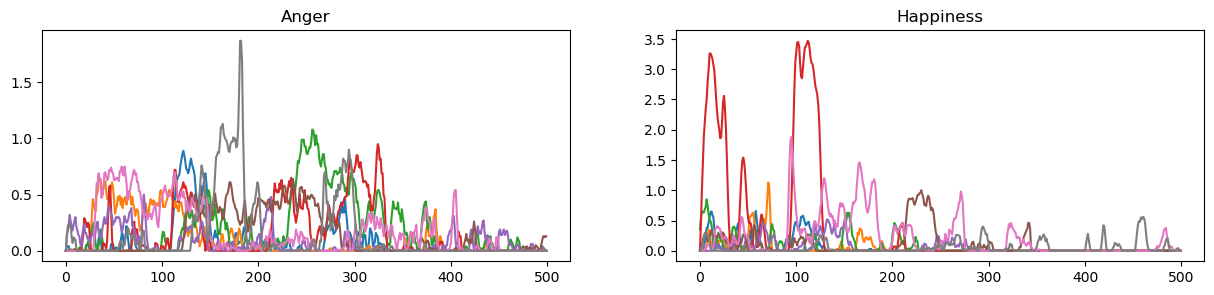

AU02 (outer brow raiser)


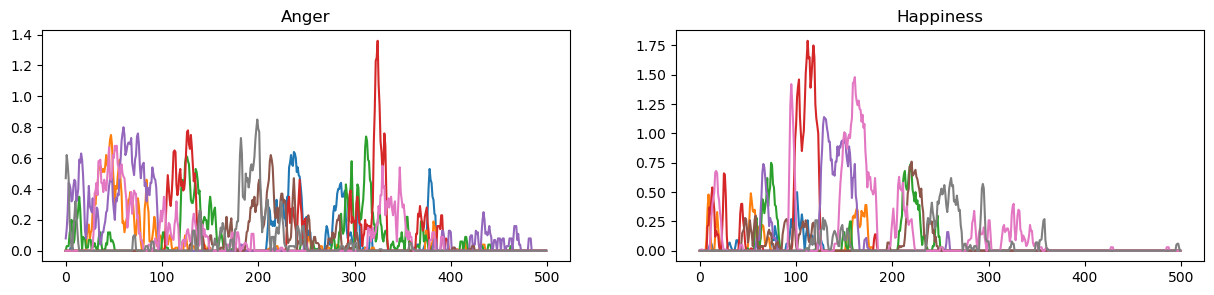

AU04 (brow lowerer)


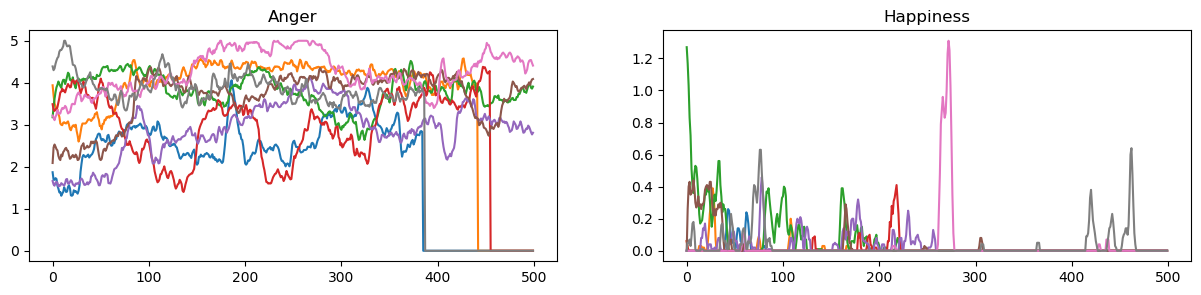

AU05 (upper lid raiser)


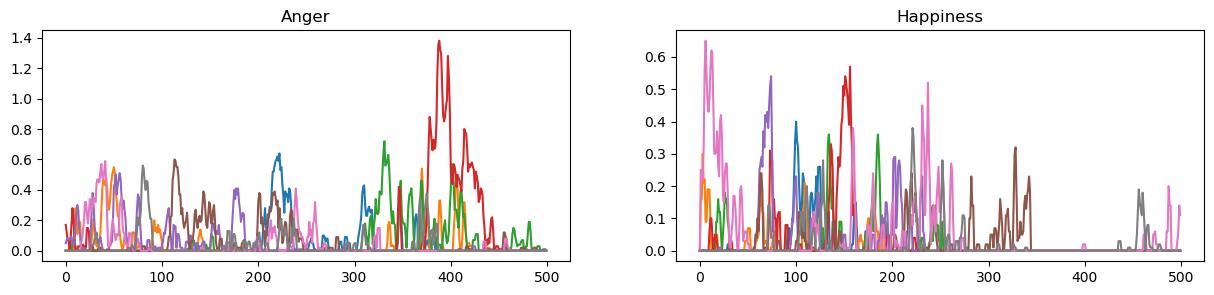

AU06 (cheek raiser)


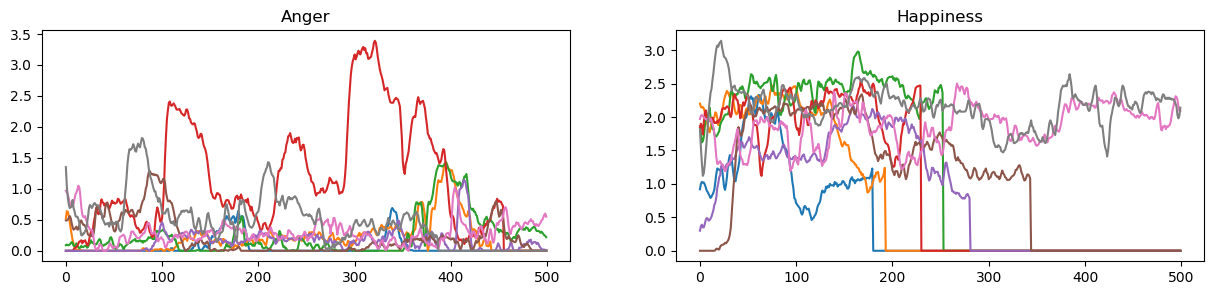

AU07 (lid tightener)


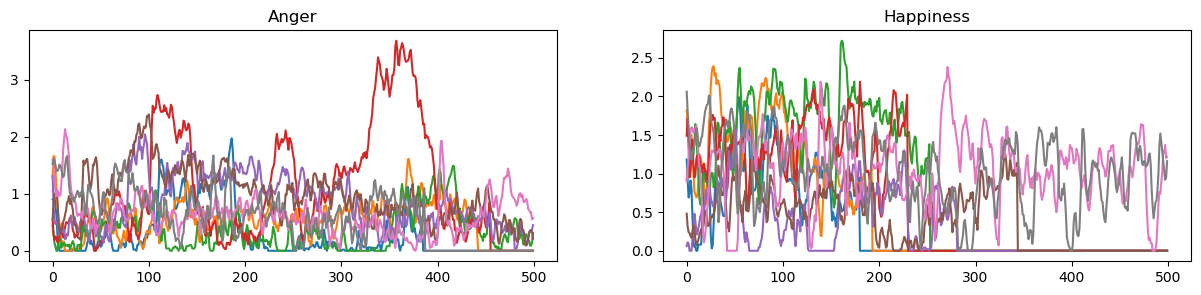

AU09 (nose wrinkler)


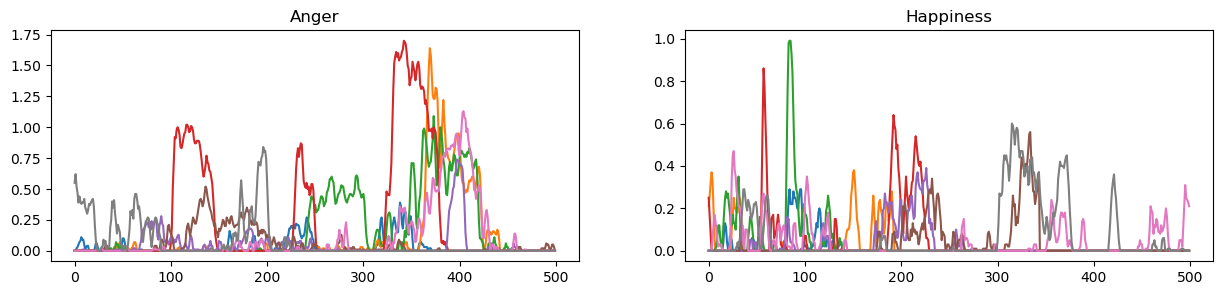

AU10 (upper lip raiser)


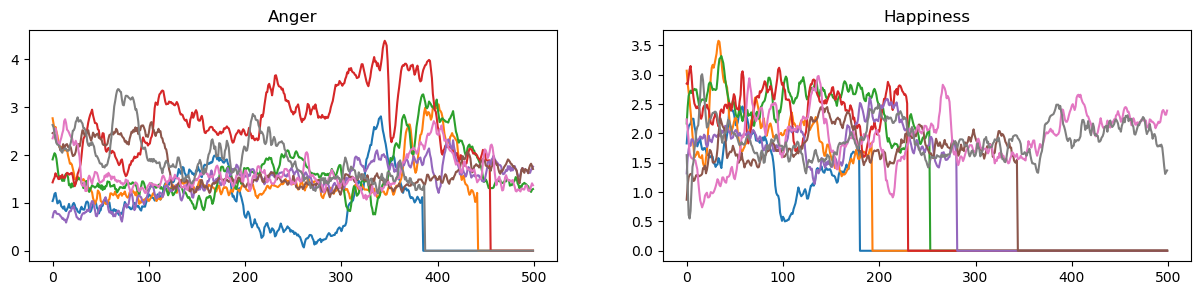

AU12 (lip corner puller)


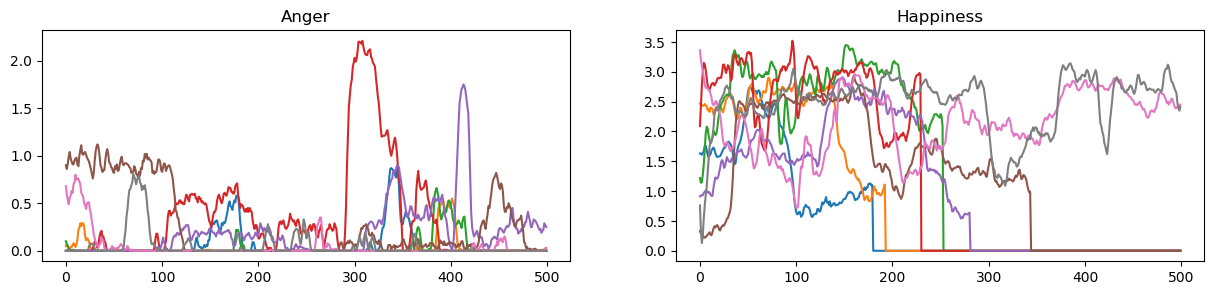

AU14 (dimpler)


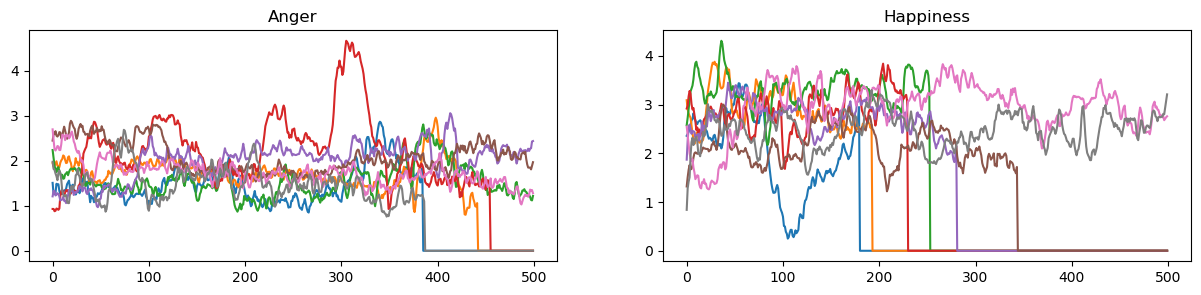

AU15 (lip corner depressor)


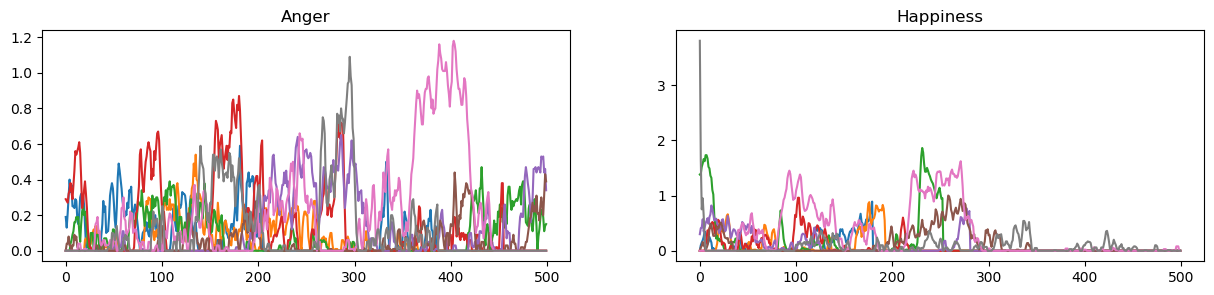

AU17 (chin raiser)


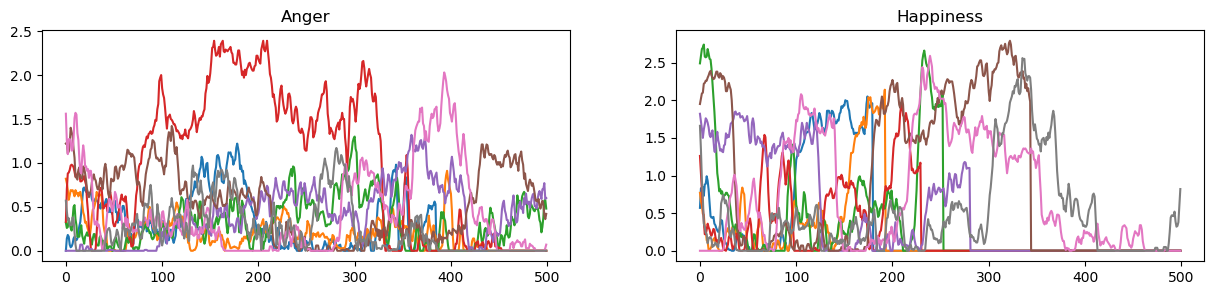

AU20 (lip stretcher)


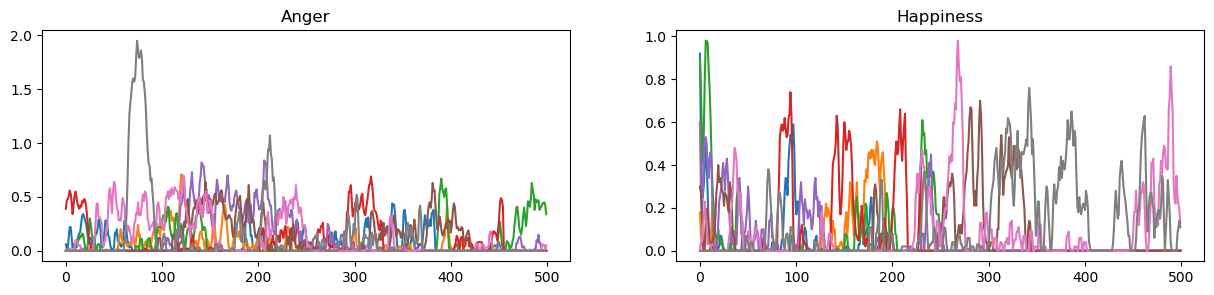

AU23 (lip tightener)


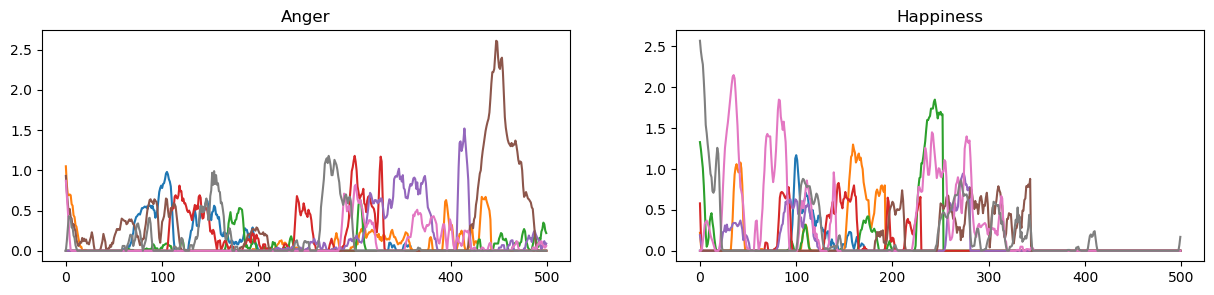

AU25 (lips part)


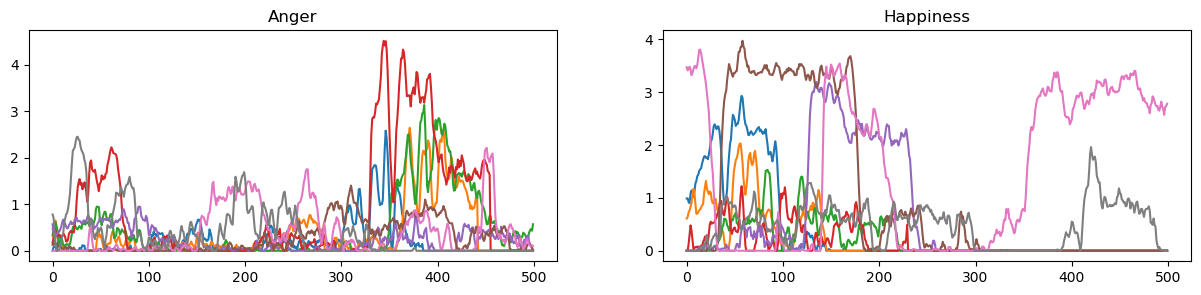

AU26 (jaw drop)


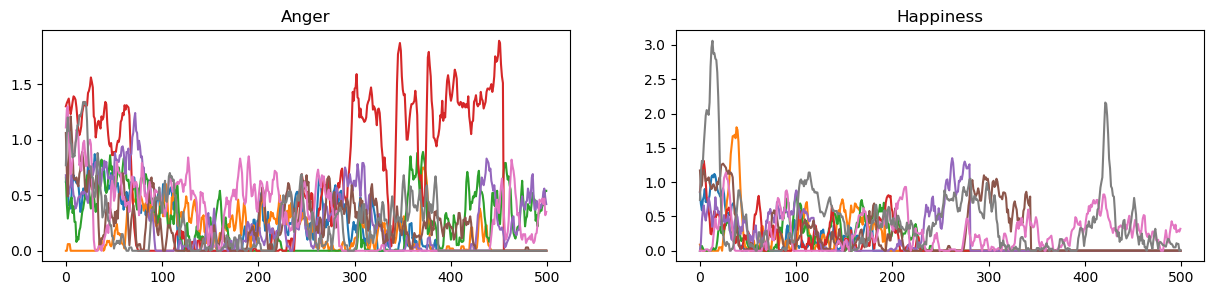

AU45 (blink)


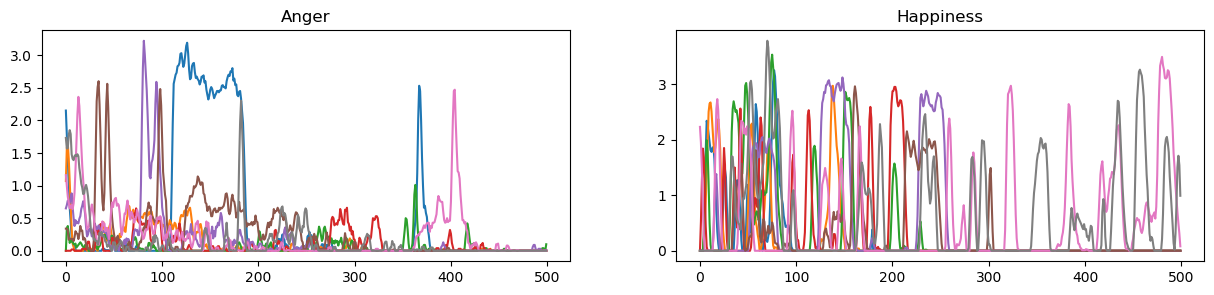

In [32]:
for au_idx, AU in enumerate(AU_INTENSITY_COLS):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    for vid_idx in range(8):
        axes[0].set_title("Anger")
        axes[1].set_title("Happiness")
        ts_ang = x_ang[vid_idx, :500, au_idx]
        ts_hap = x_hap[vid_idx, :500, au_idx]
        axes[0].plot(ts_ang)
        axes[1].plot(ts_hap)
    print(au_intensity_name_to_desc[AU])
    plt.show()